In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


One hot encoding -mushroom dataset

In [23]:
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
data_mushroom=pd.read_csv("mushrooms.csv")
y_mushroom=data_mushroom.target
df_mushroom=data_mushroom.drop(['target'],axis=1)
X_trainm1, X_testm1, y_trainm1, y_testm1 = train_test_split(df_mushroom, y_mushroom, test_size=0.2)



df_mushroom = onehotencoder.fit_transform(df_mushroom).toarray() 
print(df_mushroom.shape,data_mushroom.shape)




(8124, 117) (8124, 23)


In [3]:
data=pd.read_csv("energydata_complete.csv")
data=data.drop(['date'],axis=1)
data=(data-data.mean())/data.std()
y=data.Appliances

df=data.drop(['Appliances'],axis=1)
a=np.array([])
for i in range(len(y)):
    
    if y[i]>=(y.median(axis=0)):
        a=np.append(a,1)
    elif y[i]<(y.median(axis=0)):
        a=np.append(a,0)
df=df.assign(Class=a) 
y=df.Class

df=df.drop(['Class'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_trainm, X_testm, y_trainm, y_testm = train_test_split(df_mushroom, y_mushroom, test_size=0.2)
print(X_trainm.shape, X_testm.shape, y_trainm.shape, y_testm.shape)


(15788, 27) (3947, 27) (15788,) (3947,)
(6499, 117) (1625, 117) (6499,) (1625,)


SVM with train test split on Appliance_energy dataset

For kernel=linear:
 
Confusion Matrix:
[[ 950  535]
 [ 499 1963]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65      1485
         1.0       0.79      0.80      0.79      2462

    accuracy                           0.74      3947
   macro avg       0.72      0.72      0.72      3947
weighted avg       0.74      0.74      0.74      3947

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 989  496]
 [ 385 2077]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69      1485
         1.0       0.81      0.84      0.83      2462

    accuracy                           0.78      3947
   macro avg       0.76      0.75      0.76      3947
weighted avg       0.77      0.78      0.77      3947

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[ 822  663]
 [ 267 2195]]
 
Metrics:
            

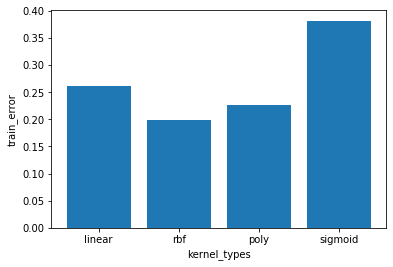

Test_error: [0.26197112 0.2232075  0.23562199 0.39295668]


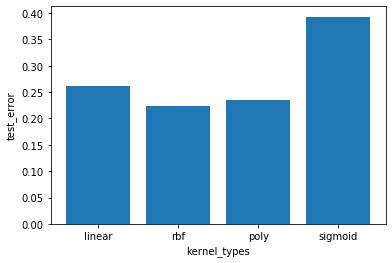

train_accuracy [0.73847226 0.80092475 0.77343552 0.61850773]
test_accuracy [0.73802888 0.7767925  0.76437801 0.60704332]
_____________________________________________________


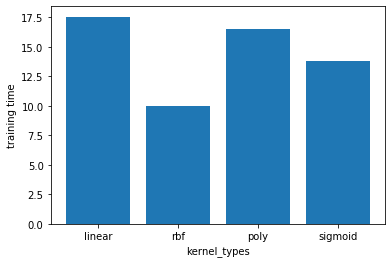

(array([0.26152774, 0.19907525, 0.22656448, 0.38149227]),
 array([0.26197112, 0.2232075 , 0.23562199, 0.39295668]))

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import time


kernels=['linear','rbf','poly','sigmoid']
def svmClassifier(X_train, X_test, y_train, y_test):
 train_error=[]
 test_error=[]
 accuracy_train=[]
 accuracy_test=[]
 train_time=[]
 t0=0
 train_times=0
 
 for i in kernels:
  clf=SVC(kernel=i,gamma='auto')
  t0=time.time()
  clf.fit(X_train,y_train)
  train_times=round(time.time()-t0,3)
  train_time.append(train_times)
  y_trainpred=clf.predict(X_train)
  y_pred=clf.predict(X_test)
  
  
  accuracy=accuracy_score(y_train, y_trainpred)
  error_train=1-accuracy
  train_error=np.append(train_error,error_train)
  accuracy_train=np.append(accuracy_train,accuracy)
  accuracy=accuracy_score(y_test, y_pred)
  error_test=1-accuracy
  test_error=np.append(test_error,error_test)
  accuracy_test=np.append(accuracy_test,accuracy)
  
  
  print("For kernel={}:".format(i))
  print(" ")
  print("Confusion Matrix:")
  print(confusion_matrix(y_test,y_pred))
  print(" ")
  print("Metrics:")
  print(classification_report(y_test,y_pred))
  print("_____________________________________________________")

 print(" ")
 
 print("Train_error: {}" .format(train_error))
 plt.bar(kernels,train_error)
 plt.xlabel("kernel_types")
 plt.ylabel("train_error")
 plt.show()
 print("Test_error: {}" .format(test_error))
 plt.bar(kernels,test_error)
 plt.xlabel("kernel_types")
 plt.ylabel("test_error")
 plt.show()
 print("train_accuracy {}".format(accuracy_train))
 print("test_accuracy {}".format(accuracy_test))
 print("_____________________________________________________")
 plt.bar(kernels,train_time)
 plt.xlabel("kernel_types")
 plt.ylabel("training time")
 plt.show()
 return train_error,test_error
 
 
svmClassifier(X_train, X_test, y_train, y_test)


with validation set

For kernel=linear:
 
Confusion Matrix:
[[1935  212]
 [ 842  958]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79      2147
         1.0       0.82      0.53      0.65      1800

    accuracy                           0.73      3947
   macro avg       0.76      0.72      0.72      3947
weighted avg       0.75      0.73      0.72      3947

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 813 1334]
 [ 318 1482]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.72      0.38      0.50      2147
         1.0       0.53      0.82      0.64      1800

    accuracy                           0.58      3947
   macro avg       0.62      0.60      0.57      3947
weighted avg       0.63      0.58      0.56      3947

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[1742  405]
 [ 728 1072]]
 
Metrics:
            

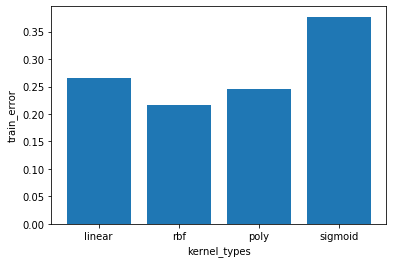

Test_error: [0.26703826 0.41854573 0.28705346 0.46338992]


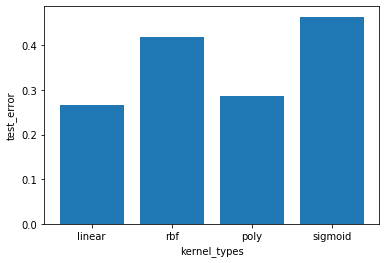

train_accuracy [0.73479858 0.78375982 0.75481378 0.62313149]
test_accuracy [0.73296174 0.58145427 0.71294654 0.53661008]
_____________________________________________________


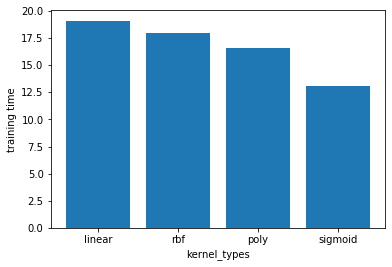

For kernel=linear:
 
Confusion Matrix:
[[ 997  533]
 [ 506 1911]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66      1530
         1.0       0.78      0.79      0.79      2417

    accuracy                           0.74      3947
   macro avg       0.72      0.72      0.72      3947
weighted avg       0.74      0.74      0.74      3947

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 902  628]
 [ 464 1953]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62      1530
         1.0       0.76      0.81      0.78      2417

    accuracy                           0.72      3947
   macro avg       0.71      0.70      0.70      3947
weighted avg       0.72      0.72      0.72      3947

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[ 546  984]
 [ 217 2200]]
 
Metrics:
            

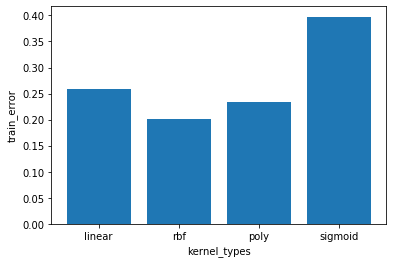

Test_error: [0.2632379  0.27666582 0.30428173 0.44337471]


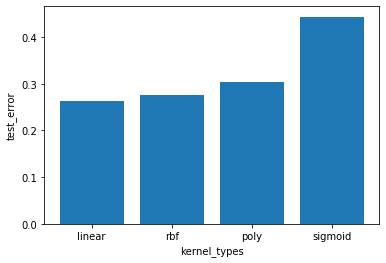

train_accuracy [0.74106917 0.79959463 0.76684824 0.60267292]
test_accuracy [0.7367621  0.72333418 0.69571827 0.55662529]
_____________________________________________________


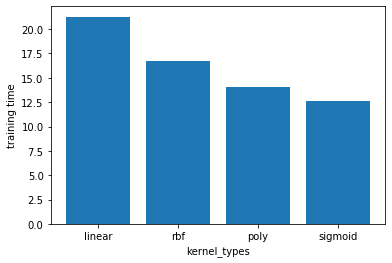

For kernel=linear:
 
Confusion Matrix:
[[ 853  621]
 [ 518 1955]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.62      0.58      0.60      1474
         1.0       0.76      0.79      0.77      2473

    accuracy                           0.71      3947
   macro avg       0.69      0.68      0.69      3947
weighted avg       0.71      0.71      0.71      3947

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 802  672]
 [ 500 1973]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.62      0.54      0.58      1474
         1.0       0.75      0.80      0.77      2473

    accuracy                           0.70      3947
   macro avg       0.68      0.67      0.67      3947
weighted avg       0.70      0.70      0.70      3947

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[ 315 1159]
 [  93 2380]]
 
Metrics:
            

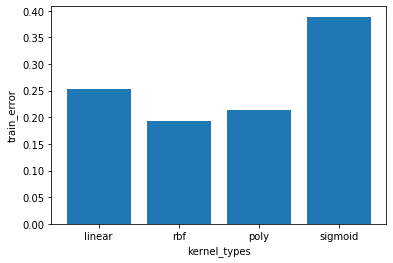

Test_error: [0.2885736  0.29693438 0.31720294 0.33341779]


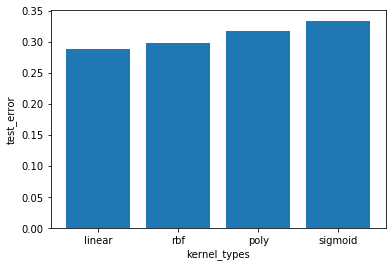

train_accuracy [0.74581961 0.80675196 0.78623005 0.61116037]
test_accuracy [0.7114264  0.70306562 0.68279706 0.66658221]
_____________________________________________________


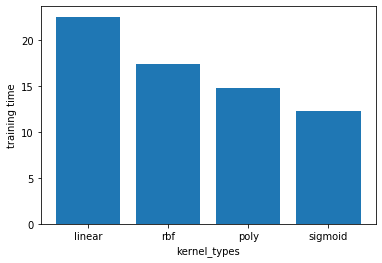

For kernel=linear:
 
Confusion Matrix:
[[ 571  648]
 [ 491 2237]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.54      0.47      0.50      1219
         1.0       0.78      0.82      0.80      2728

    accuracy                           0.71      3947
   macro avg       0.66      0.64      0.65      3947
weighted avg       0.70      0.71      0.71      3947

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 615  604]
 [ 496 2232]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.55      0.50      0.53      1219
         1.0       0.79      0.82      0.80      2728

    accuracy                           0.72      3947
   macro avg       0.67      0.66      0.67      3947
weighted avg       0.71      0.72      0.72      3947

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[ 227  992]
 [ 217 2511]]
 
Metrics:
            

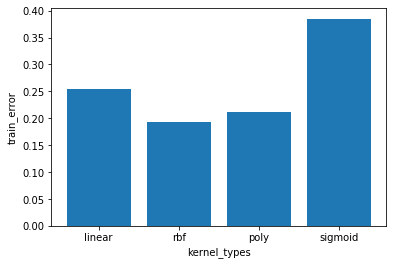

Test_error: [0.2885736  0.27869268 0.30630859 0.32759058]


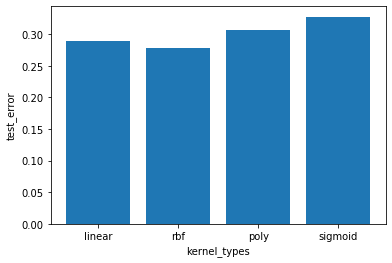

train_accuracy [0.746453   0.80751203 0.78908031 0.61508741]
test_accuracy [0.7114264  0.72130732 0.69369141 0.67240942]
_____________________________________________________


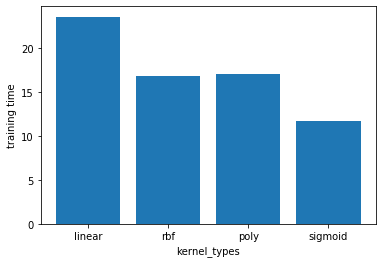

For kernel=linear:
 
Confusion Matrix:
[[ 385  707]
 [ 317 2538]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.55      0.35      0.43      1092
         1.0       0.78      0.89      0.83      2855

    accuracy                           0.74      3947
   macro avg       0.67      0.62      0.63      3947
weighted avg       0.72      0.74      0.72      3947

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 139  953]
 [ 173 2682]]
 
Metrics:
              precision    recall  f1-score   support

         0.0       0.45      0.13      0.20      1092
         1.0       0.74      0.94      0.83      2855

    accuracy                           0.71      3947
   macro avg       0.59      0.53      0.51      3947
weighted avg       0.66      0.71      0.65      3947

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[ 169  923]
 [ 289 2566]]
 
Metrics:
            

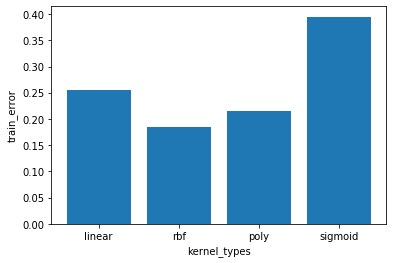

Test_error: [0.25943755 0.28527996 0.30706866 0.49151254]


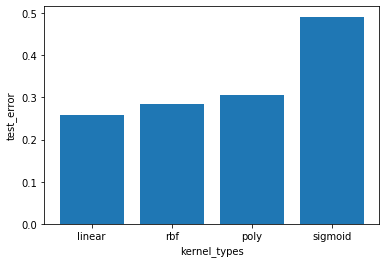

train_accuracy [0.7453129  0.81485939 0.7850266  0.60526983]
test_accuracy [0.74056245 0.71472004 0.69293134 0.50848746]
_____________________________________________________


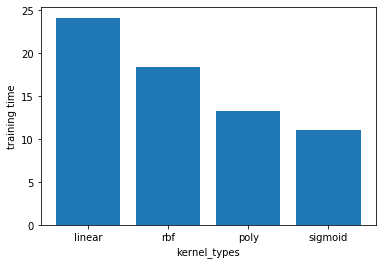

____________________________________________________
Average train error:


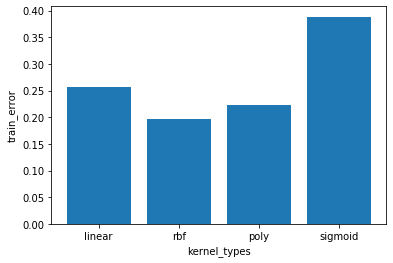

Average test error:


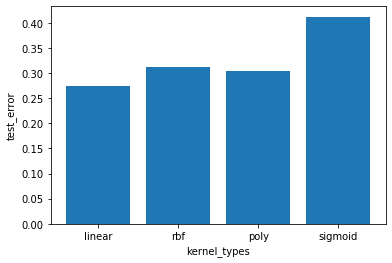

Average Accuracy:


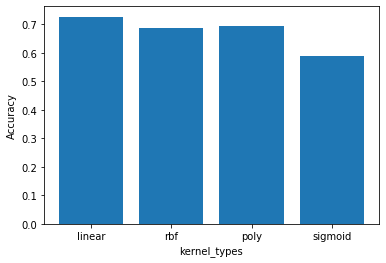

In [5]:
from sklearn.model_selection import KFold

def cal_avg(values):
    value_avg = []
    avg=0
    for i in range(len(values[0])):
        for j in range (len(values)):
            avg += values[j][i]
        value_avg.append(avg/len(values))
        avg =0 
    
    return value_avg

def cvSvm(df,y):
 kf=KFold(n_splits=5,shuffle=False)

 train_e=[]
 test_e=[]
 accuracy=[]
 train_avg = []
 test_avg = []

 for train_index, test_index in kf.split(df):
 #print("TRAIN:{} , TEST:{}" .format(train_index,test_index))
  X_trainv, X_testv = df.iloc[train_index], df.iloc[test_index]
  y_trainv, y_testv = y[train_index], y[test_index]

  trainErr, testErr= svmClassifier(X_trainv, X_testv, y_trainv, y_testv)
  train_e.append(trainErr)
  test_e.append(testErr)
  

 



 train_avg=cal_avg(train_e)
 test_avg=cal_avg(test_e)
 
 accuracy=np.subtract(1,test_avg)
 print("____________________________________________________")
 
 print("Average train error:")
 plt.bar(kernels,train_avg)
 plt.xlabel("kernel_types")
 plt.ylabel("train_error")
 plt.show()
 print("Average test error:")
 plt.bar(kernels,test_avg)
 plt.xlabel("kernel_types")
 plt.ylabel("test_error")
 plt.show()
 print("Average Accuracy:")
 plt.bar(kernels,accuracy)
 plt.xlabel("kernel_types")
 plt.ylabel("Accuracy")
 plt.show()
 


cvSvm(df,y)


Mushroom dataset

For kernel=linear:
 
Confusion Matrix:
[[856   0]
 [  0 769]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       856
           p       1.00      1.00      1.00       769

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[856   0]
 [  3 766]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       856
           p       1.00      1.00      1.00       769

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[856   0]
 [ 89 680]]
 
Metrics:
              precision 

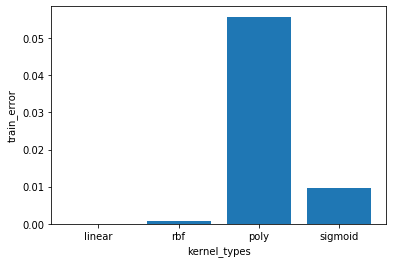

Test_error: [0.         0.00184615 0.05476923 0.01107692]


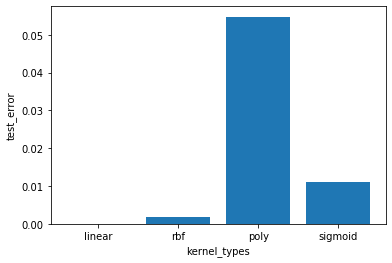

train_accuracy [1.         0.99923065 0.94429912 0.99046007]
test_accuracy [1.         0.99815385 0.94523077 0.98892308]
_____________________________________________________


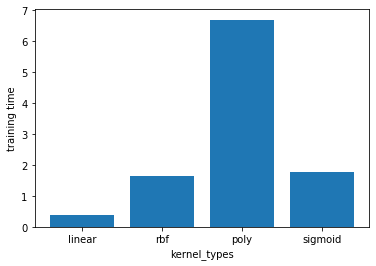

(array([0.        , 0.00076935, 0.05570088, 0.00953993]),
 array([0.        , 0.00184615, 0.05476923, 0.01107692]))

In [6]:
svmClassifier(X_trainm, X_testm, y_trainm, y_testm)

with cross validation

For kernel=linear:
 
Confusion Matrix:
[[1432    0]
 [   0  193]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1432
           p       1.00      1.00      1.00       193

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[1293  139]
 [   0  193]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      0.90      0.95      1432
           p       0.58      1.00      0.74       193

    accuracy                           0.91      1625
   macro avg       0.79      0.95      0.84      1625
weighted avg       0.95      0.91      0.92      1625

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[1409   23]
 [  13  180]]
 
Metrics:
            

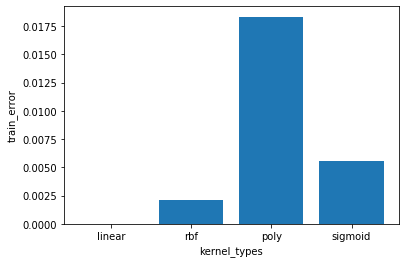

Test_error: [0.         0.08553846 0.02215385 0.26338462]


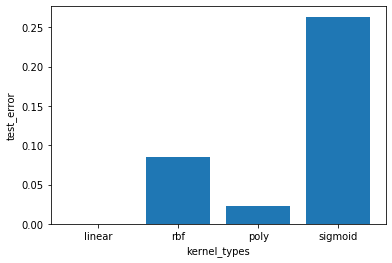

train_accuracy [1.         0.99784582 0.98168949 0.99446069]
test_accuracy [1.         0.91446154 0.97784615 0.73661538]
_____________________________________________________


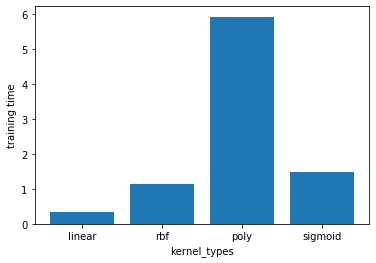

For kernel=linear:
 
Confusion Matrix:
[[1440    0]
 [   0  185]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1440
           p       1.00      1.00      1.00       185

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[1440    0]
 [   0  185]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1440
           p       1.00      1.00      1.00       185

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[1440    0]
 [  94   91]]
 
Metrics:
            

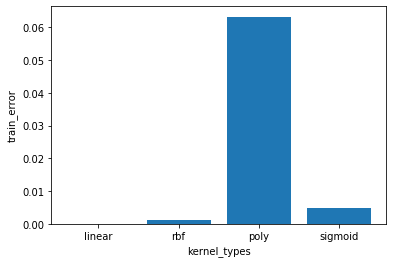

Test_error: [0.         0.         0.05784615 0.        ]


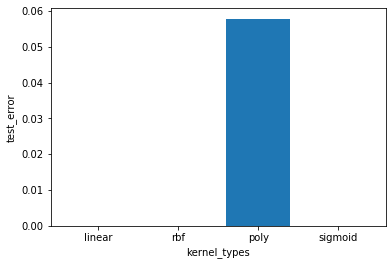

train_accuracy [1.         0.99876904 0.9367595  0.99507617]
test_accuracy [1.         1.         0.94215385 1.        ]
_____________________________________________________


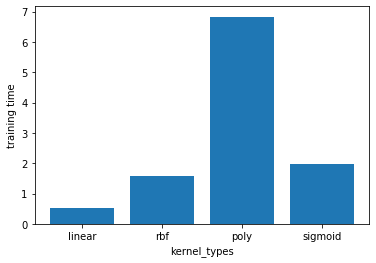

For kernel=linear:
 
Confusion Matrix:
[[ 553    0]
 [   0 1072]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       553
           p       1.00      1.00      1.00      1072

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 553    0]
 [   1 1071]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       553
           p       1.00      1.00      1.00      1072

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[553   0]
 [148 924]]
 
Metrics:
              pr

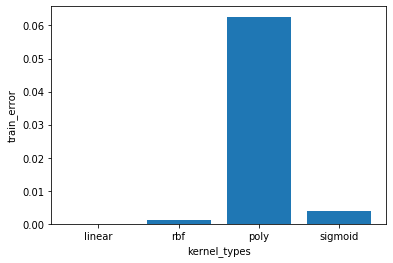

Test_error: [0.         0.00061538 0.09107692 0.01907692]


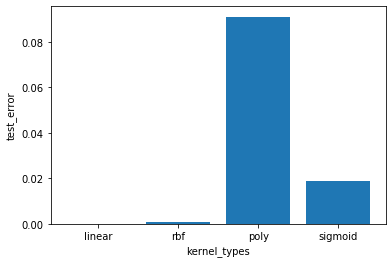

train_accuracy [1.         0.99892291 0.93737498 0.99615325]
test_accuracy [1.         0.99938462 0.90892308 0.98092308]
_____________________________________________________


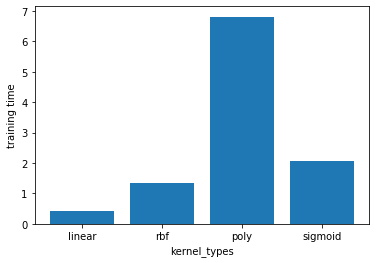

For kernel=linear:
 
Confusion Matrix:
[[ 276    0]
 [   0 1349]]
 
Metrics:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       276
           p       1.00      1.00      1.00      1349

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 255   21]
 [  74 1275]]
 
Metrics:
              precision    recall  f1-score   support

           e       0.78      0.92      0.84       276
           p       0.98      0.95      0.96      1349

    accuracy                           0.94      1625
   macro avg       0.88      0.93      0.90      1625
weighted avg       0.95      0.94      0.94      1625

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[ 254   22]
 [ 329 1020]]
 
Metrics:
            

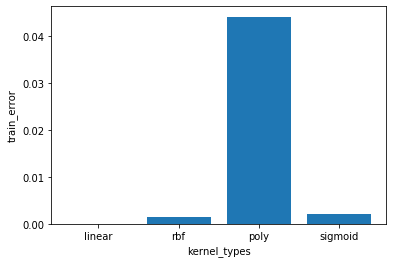

Test_error: [0.         0.05846154 0.216      0.07753846]


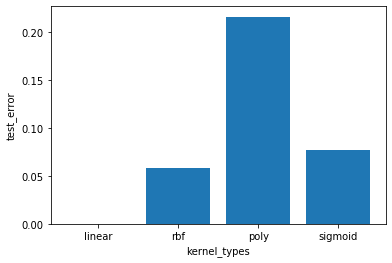

train_accuracy [1.         0.99861517 0.95583936 0.99784582]
test_accuracy [1.         0.94153846 0.784      0.92246154]
_____________________________________________________


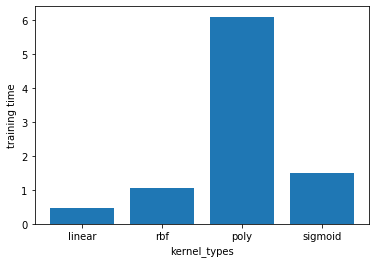

For kernel=linear:
 
Confusion Matrix:
[[ 507    0]
 [   8 1109]]
 
Metrics:
              precision    recall  f1-score   support

           e       0.98      1.00      0.99       507
           p       1.00      0.99      1.00      1117

    accuracy                           1.00      1624
   macro avg       0.99      1.00      0.99      1624
weighted avg       1.00      1.00      1.00      1624

_____________________________________________________
For kernel=rbf:
 
Confusion Matrix:
[[ 471   36]
 [   8 1109]]
 
Metrics:
              precision    recall  f1-score   support

           e       0.98      0.93      0.96       507
           p       0.97      0.99      0.98      1117

    accuracy                           0.97      1624
   macro avg       0.98      0.96      0.97      1624
weighted avg       0.97      0.97      0.97      1624

_____________________________________________________
For kernel=poly:
 
Confusion Matrix:
[[ 507    0]
 [  43 1074]]
 
Metrics:
            

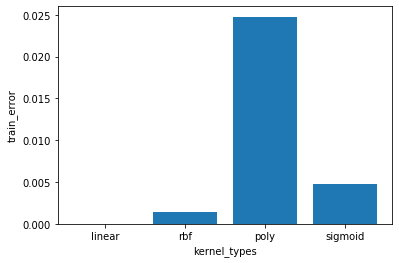

Test_error: [0.00492611 0.0270936  0.02647783 0.0203202 ]


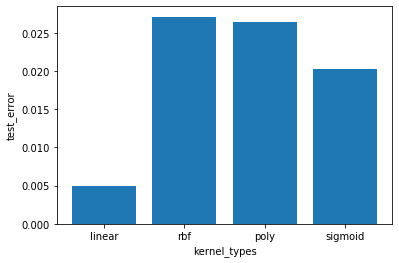

train_accuracy [1.         0.99861538 0.97523077 0.99523077]
test_accuracy [0.99507389 0.9729064  0.97352217 0.9796798 ]
_____________________________________________________


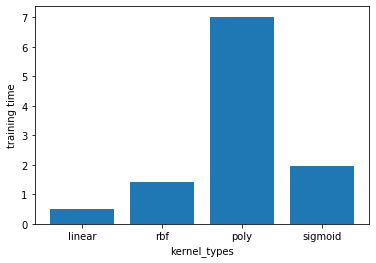

____________________________________________________
Average train error:


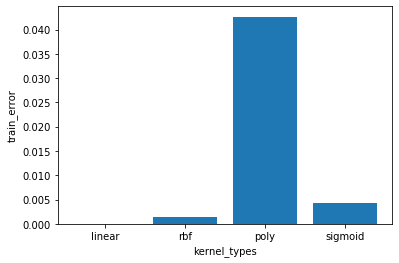

Average test error:


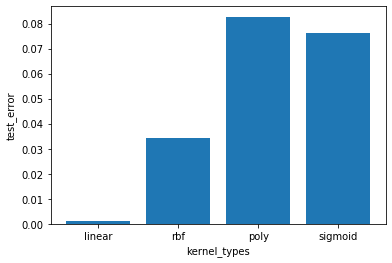

Average Accuracy:


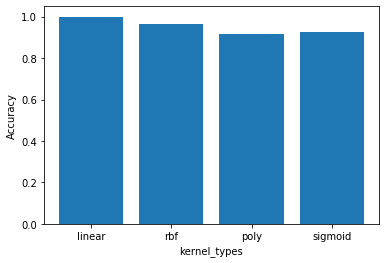

In [7]:

df_mushroom=pd.DataFrame(df_mushroom)

cvSvm(df_mushroom,y_mushroom)

Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

def dtree(X_train,y_train,X_test,y_test,depth=None,random_state=285):
    
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy",max_depth=depth)
    t1=time.time()
    clf_entropy= clf_entropy.fit(X_train,y_train)
    train_timet=round(time.time()-t1,3)
    ypredtrain=clf_entropy.predict(X_train)

    ypredt=clf_entropy.predict(X_test)
    #print(y_test,ypredt)
    train_error=1-(accuracy_score(y_train,ypredtrain))
    test_error=1-(accuracy_score(y_test,ypredt))
    print("depth of tree:{}".format(clf_entropy.tree_.max_depth))
    print("")
    print("Confusion Matrix: ") 
    print(confusion_matrix(y_test, ypredt)) 
    print("___________________________________________")   
    print ("train error :")
    print(train_error)
    print ("Accuracy train:")
    print(accuracy_score(y_train,ypredtrain)*100)
    print ("test error :")
    print(test_error)
    print ("Accuracy test :")
    print(accuracy_score(y_test,ypredt)*100)
    print("___________________________________________")      
    print("Report : ")
    print( classification_report(y_test, ypredt)) 
    print("___________________________________________")
    print("training time :{}".format(train_timet))
    #tree.plot_tree(clf_entropy)
    return train_error,test_error
dtree(X_train,y_train,X_test,y_test)


depth of tree:43

Confusion Matrix: 
[[1062  423]
 [ 406 2056]]
___________________________________________
train error :
0.0
Accuracy train:
100.0
test error :
0.21003293640739806
Accuracy test :
78.99670635926019
___________________________________________
Report : 
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      1485
         1.0       0.83      0.84      0.83      2462

    accuracy                           0.79      3947
   macro avg       0.78      0.78      0.78      3947
weighted avg       0.79      0.79      0.79      3947

___________________________________________
training time :0.573


(0.0, 0.21003293640739806)

With Validation set

In [31]:
def cvtree(df,y,depth=None):
 kf=KFold(n_splits=5,shuffle=False)

 train_et=[]
 test_et=[]
 accuracyt=[]
 train_avgt = []
 test_avgt = []
 for train_index, test_index in kf.split(df):
 #print("TRAIN:{} , TEST:{}" .format(train_index,test_index))
  X_trainvt, X_testvt = df.iloc[train_index], df.iloc[test_index]
  y_trainvt, y_testvt = y[train_index], y[test_index]

  trainErrt, testErrt = dtree(X_trainvt, y_trainvt, X_testvt,  y_testvt,depth)
  train_et.append(trainErrt)
  test_et.append(testErrt)

 



 train_avgt=np.mean(train_et)
 test_avgt=np.mean(test_et)
 accuracyt=np.subtract(1,test_avgt)
 print("____________________________________________________")
 
 print("Average train error:")
 print(train_avgt)
 print("Average test error:")
 print(test_avgt)
 print("Average Accuracy:")
 print(accuracyt)
 return train_avgt,test_avgt
cvtree(df,y)

depth of tree:45

Confusion Matrix: 
[[ 566 1581]
 [ 405 1395]]
___________________________________________
train error :
0.0
Accuracy train:
100.0
test error :
0.5031669622498101
Accuracy test :
49.683303775019
___________________________________________
Report : 
              precision    recall  f1-score   support

         0.0       0.58      0.26      0.36      2147
         1.0       0.47      0.78      0.58      1800

    accuracy                           0.50      3947
   macro avg       0.53      0.52      0.47      3947
weighted avg       0.53      0.50      0.46      3947

___________________________________________
training time :0.477
depth of tree:45

Confusion Matrix: 
[[ 712  818]
 [ 727 1690]]
___________________________________________
train error :
0.0
Accuracy train:
100.0
test error :
0.3914365340765138
Accuracy test :
60.85634659234862
___________________________________________
Report : 
              precision    recall  f1-score   support

         0.0       

(0.0, 0.40633392449962)

Mushroom dataset

In [28]:
dtree(X_trainm,y_trainm,X_testm,y_testm)

depth of tree:5

Confusion Matrix: 
[[856   0]
 [  0 769]]
___________________________________________
train error :
0.0
Accuracy train:
100.0
test error :
0.0
Accuracy test :
100.0
___________________________________________
Report : 
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       856
           p       1.00      1.00      1.00       769

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

___________________________________________
training time :0.034


(0.0, 0.0)

In [32]:
cvtree(df_mushroom,y_mushroom)

depth of tree:5

Confusion Matrix: 
[[1432    0]
 [   0  193]]
___________________________________________
train error :
0.0
Accuracy train:
100.0
test error :
0.0
Accuracy test :
100.0
___________________________________________
Report : 
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1432
           p       1.00      1.00      1.00       193

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

___________________________________________
training time :0.038
depth of tree:6

Confusion Matrix: 
[[1440    0]
 [   0  185]]
___________________________________________
train error :
0.0
Accuracy train:
100.0
test error :
0.0
Accuracy test :
100.0
___________________________________________
Report : 
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1440
           p       

(0.0, 0.003447366426676779)

pruning

depth of tree:2

Confusion Matrix: 
[[1081 1066]
 [ 191 1609]]
___________________________________________
train error :
0.2995312895870281
Accuracy train:
70.04687104129718
test error :
0.3184697238408918
Accuracy test :
68.15302761591082
___________________________________________
Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.50      0.63      2147
         1.0       0.60      0.89      0.72      1800

    accuracy                           0.68      3947
   macro avg       0.73      0.70      0.68      3947
weighted avg       0.74      0.68      0.67      3947

___________________________________________
training time :0.077
depth of tree:2

Confusion Matrix: 
[[1255  275]
 [1267 1150]]
___________________________________________
train error :
0.29376741829237396
Accuracy train:
70.6232581707626
test error :
0.39067646313655946
Accuracy test :
60.93235368634405
___________________________________________
Report : 
              preci

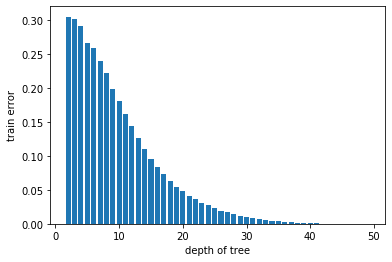

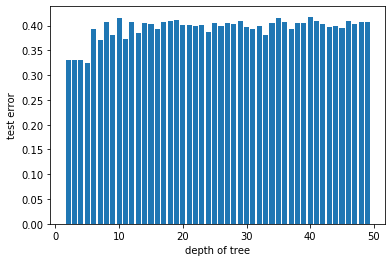

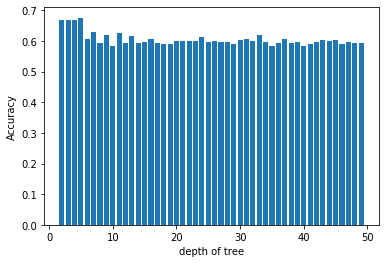

In [30]:
def dtreeprune(df,y,depth):
    
   
    train_error=[]
    test_error=[]
    accuracy=[]
    for i in range(len(depth)):
      traine,teste= cvtree( df,y,depth[i])
      train_error=np.append(train_error,traine)
      test_error=np.append(test_error,teste)
      accuracy=np.append(accuracy,1-teste)

    
    plt.bar(depth,train_error)
    plt.xlabel("depth of tree")
    plt.ylabel("train error")
    plt.show()
    plt.bar(depth,test_error)
    plt.xlabel("depth of tree")
    plt.ylabel("test error")
    plt.show()
    plt.bar(depth,accuracy)
    plt.xlabel("depth of tree")
    plt.ylabel("Accuracy")
    
    #return train_error,test_error
depth=[i for i in range(2,50)]
dtreeprune(df,y,depth)

1
Confusion Matrix: 
[[668 764]
 [  0 193]]
___________________________________________
train error :
0.024003692875827043
Accuracy train:
97.5996307124173
test error :
0.47015384615384614
Accuracy test :
52.98461538461539
___________________________________________
Report : 
              precision    recall  f1-score   support

           e       1.00      0.47      0.64      1432
           p       0.20      1.00      0.34       193

    accuracy                           0.53      1625
   macro avg       0.60      0.73      0.49      1625
weighted avg       0.91      0.53      0.60      1625

___________________________________________
training time :0.031
1
Confusion Matrix: 
[[1404   36]
 [   0  185]]
___________________________________________
train error :
0.13602092629635332
Accuracy train:
86.39790737036466
test error :
0.02215384615384619
Accuracy test :
97.78461538461538
___________________________________________
Report : 
              precision    recall  f1-score   supp

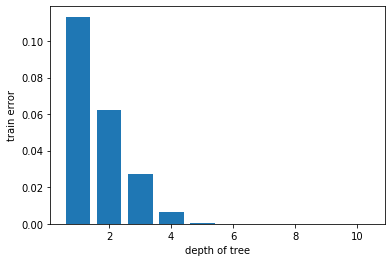

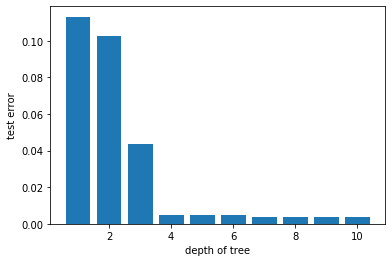

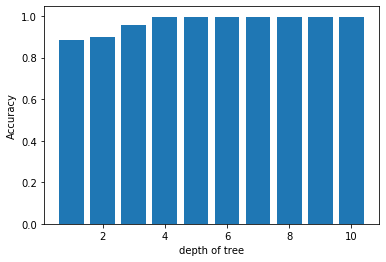

In [13]:
depth1=[1,2,3,4,5,6,7,8,9,10]
dtreeprune(df_mushroom,y_mushroom,depth1)

AdaBoost-Adaptive Boosting


In [14]:
from sklearn.ensemble import AdaBoostClassifier

def boost(X_train,y_train,X_test,y_test):
 accuracy_boost=[]
 t2=0
 train_timeb=0
 train_timeboost=[]
 weak_learner=DecisionTreeClassifier(criterion='entropy',max_depth=1)
 for i in range(len(n_estimators)):
  ensemble=AdaBoostClassifier(base_estimator=weak_learner,n_estimators=n_estimators[i],learning_rate=1)
  t2=time.time()
  boostmodel=ensemble.fit(X_train,y_train)
  train_timeb=round(time.time()-t2,3)
  train_timeboost.append(train_timeb)
  y_predboost=boostmodel.predict(X_test)
  accuracy_boost=np.append(accuracy_boost,accuracy_score(y_test,y_predboost))
 plt.bar(n_estimators,accuracy_boost)
 plt.xlabel("no of estimators")
 plt.ylabel("accuracy boost")
 plt.show()
 plt.bar(n_estimators,train_timeboost)
 plt.xlabel("no of estimators")
 plt.ylabel("training time")
 plt.show()
    
 return accuracy_boost

n_estimators=[5,10,20,50,100,150,200,250,300,350,400,450,500]

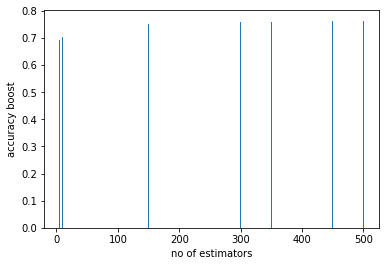

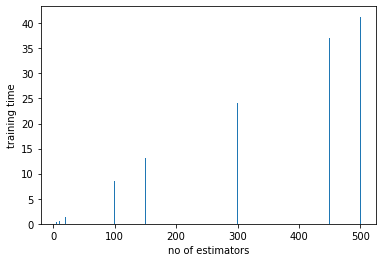

Accuracy of Energy dataset :[0.69115784 0.70357233 0.72814796 0.74132252 0.74588295 0.74917659
 0.74841652 0.75576387 0.75703066 0.7585508  0.76057765 0.76311122
 0.76311122] 


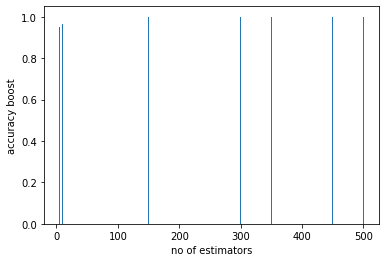

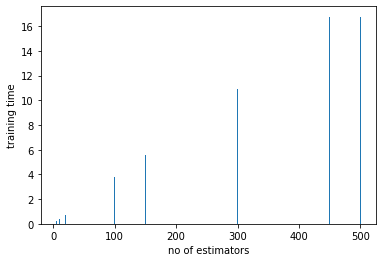

Accuracy od Mushrrom dataset :[0.94953846 0.96369231 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ] 


In [15]:
print("Accuracy of Energy dataset :{} ".format(boost(X_train,y_train,X_test,y_test)))
print("Accuracy od Mushrrom dataset :{} ".format(boost(X_trainm,y_trainm,X_testm,y_testm)))

Validation set

In [16]:
def cvBoost(df,y):
 kf=KFold(n_splits=5,shuffle=False)

 accuracy_boost=[]
 accuracy_avg=[]
 accuracy=[]
 for train_index, test_index in kf.split(df):
 #print("TRAIN:{} , TEST:{}" .format(train_index,test_index))
    X_trainv, X_testv = df.iloc[train_index], df.iloc[test_index]
    y_trainv, y_testv = y[train_index], y[test_index]

    accuracy_boost = boost(X_trainv,  y_trainv, X_testv, y_testv)
    accuracy.append(accuracy_boost)
 accuracy_avg=cal_avg(accuracy)
 plt.bar(n_estimators,accuracy_avg)
 
 plt.xlabel("no of estimators")
 plt.ylabel("Average accuracy boost")
 plt.show()
    
 
 return accuracy_avg

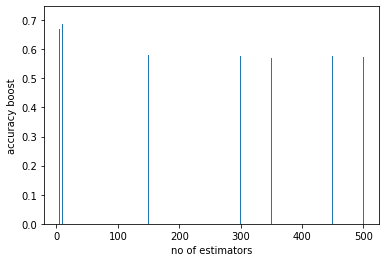

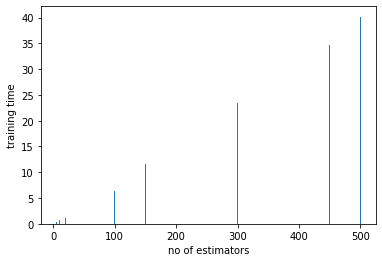

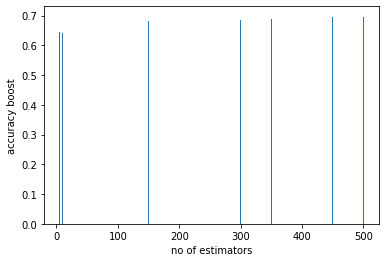

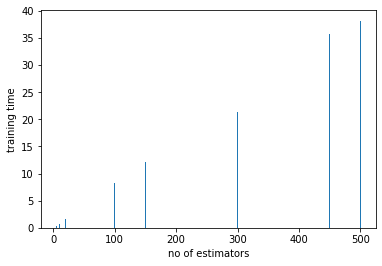

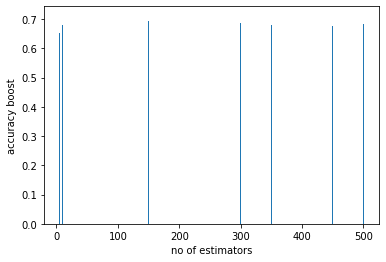

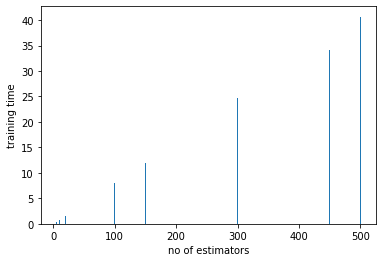

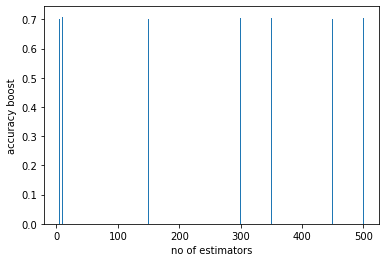

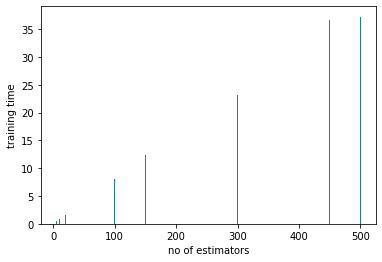

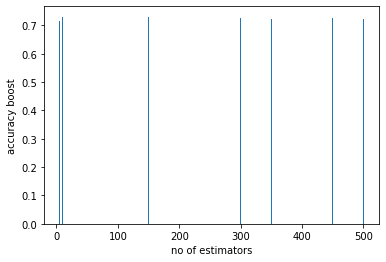

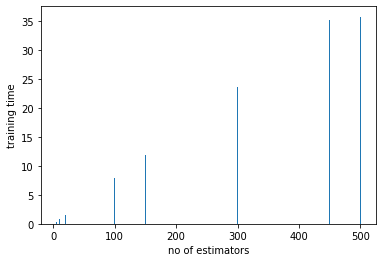

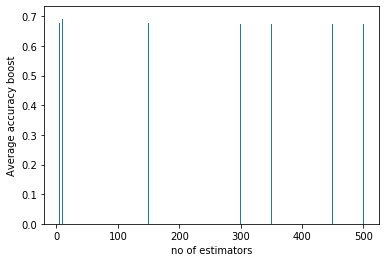

[0.676919179123385,
 0.6896376995186217,
 0.6963263237902204,
 0.6988598935900684,
 0.6780339498353178,
 0.678084621231315,
 0.6685583987838865,
 0.6709399543957436,
 0.6754497086394731,
 0.6734228527995946,
 0.6729668102356221,
 0.6752976944514821,
 0.6758550798074487]

In [17]:
cvBoost(df,y)

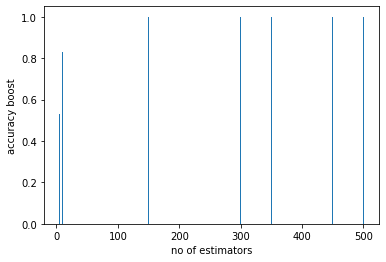

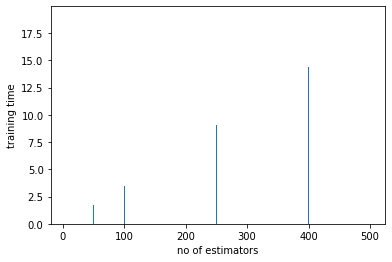

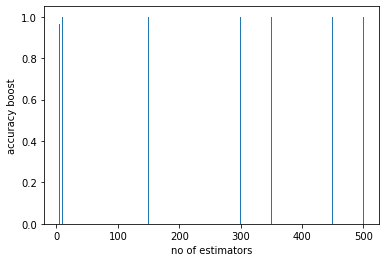

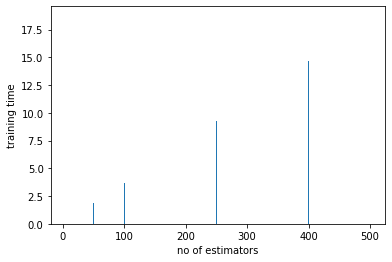

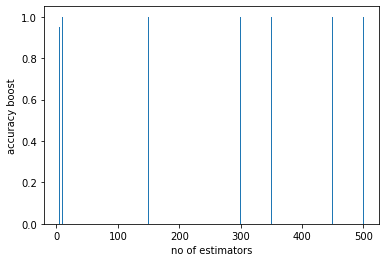

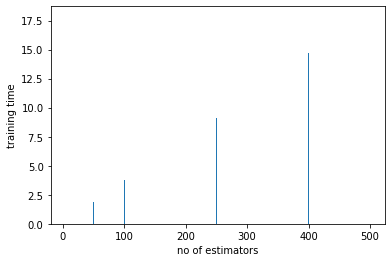

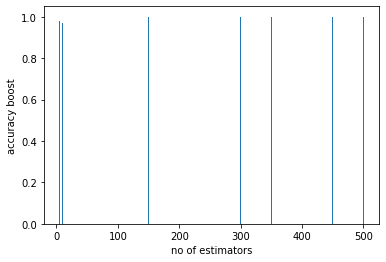

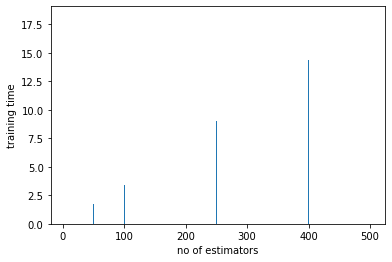

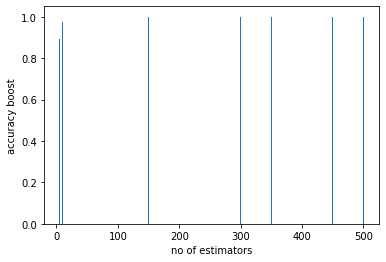

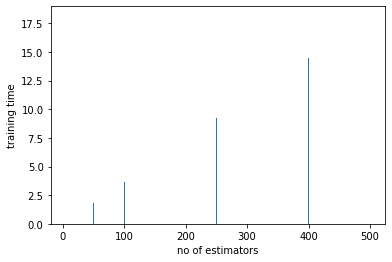

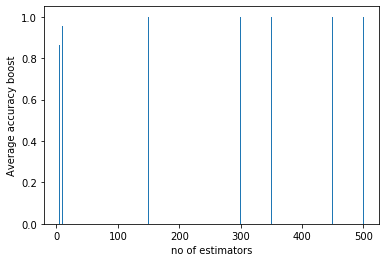

[0.8626326638878364,
 0.9540890488821523,
 0.9990147783251231,
 0.9980295566502463,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [18]:
df_mushroom=pd.DataFrame(df_mushroom)
cvBoost(df_mushroom,y_mushroom)